# ML Project 

### Done by Andrew Abrahams (ABRAND008) and Jonathan Campbell (CMPJON005)


### This project focuses of building a Convolutional Neural Network to identify and classify shapes from a dataset

## The Data

The data that we will be using is "Four Shapes" by SMESCHKE whic is available on Kaggle. The dataset contains 16000 images of four shapes. (Square, Star, Circle and triangle). The data is all pre-sorted, labeled  and placed in to individual files. 

The images are all black-and-whight PNG images and have already been croped made to have a resolution of 200x200 pixels

In [14]:
# Imports
import os
import cv2

# visu
import matplotlib.pyplot as plt

# sklearn
from sklearn.model_selection import train_test_split

#tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import History 

# Python library
import numpy as np
import matplotlib.pyplot as plt

# Seaborn for confusion matrix
import seaborn as sn

# Loading the images

There are four shape categories. The images are loaded in a numpy array as matrix and associated categories are loaded in an independent array. All images are of size 200 x 200 pixels but are reduced to 100x100 pixel to make computing time faster.

In [15]:
##Loading images in to an array
# images are not saved as images but as arrays 

shapes = ['circle', 'square', 'star', 'triangle']
location = 'shapes'

data = []
target = []


for i, shape in enumerate(shapes):
    path = os.path.join(location, shape)
    for filename in os.listdir(path):
        im = cv2.imread(os.path.join(path , filename),0)     #reades image but cv2 does not read the image it reades it as an array
        image = cv2.resize(im,(100,100))                     #reise the image to reduse computing time
        data.append(image)
        target.append(i)

        
        
data = np.array(data)
target = to_categorical(np.array(target))

In [16]:
data.shape, target.shape

((14970, 100, 100), (14970, 4))

# Train test split
The dataset is split into a training set to train model and a test set for evaluation. We will build the train set with 80% of the dataset and the test set with the 20% remaining. We keep the class repartition by setting the parameter stratify to target (which is the list containing the labels).

In [17]:
x_train, X_test, y_train, Y_test = train_test_split(data, target, test_size=0.2, stratify=target, shuffle=True)

In [20]:
def show_images(count, X, y):    
    fig, axes =plt.subplots(count//4,4, figsize = (16, count))
    for i, ind in enumerate(np.random.randint(0, X.shape[0] , count)):
        ax = axes[i//4][i%4] 
        ax.imshow(X[ind],cmap = 'gray')
        ax.title.set_text('Predicted: ' + shapes[np.argmax(y[ind])])
        ax.set_xticks([]) 
        ax.set_yticks([])

print("Training Samples dimension", x_train.shape)
print("Testing Samples dimension", X_test.shape)

Training Samples dimension (11976, 100, 100)
Testing Samples dimension (2994, 100, 100)


Let's have a look at several random shape images and associated label of our dataset:


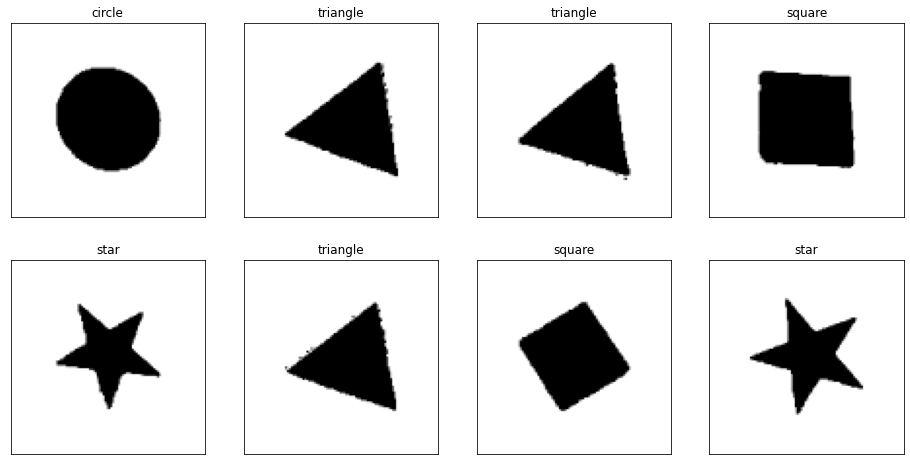

In [19]:
show_images(8, x_train, y_train)

All the images look great. this means that we dont need to do do any post prosing on them

# Creating the Convolution Neural Network

In [21]:
x_train.shape

(11976, 100, 100)

#### Creating the CNN

In [22]:
model = Sequential()

#### Making the first convolution layer

In [23]:
#Making the first convolutin layer

model.add(layers.Conv2D(32,(3,3), activation="relu", input_shape=(100,100,1), padding="same"))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#### Making the second convolution layer

In [24]:
#Making the second convolutin layer

model.add(layers.Conv2D(64,(3,3), activation="relu", padding="same"))
model.add(layers.MaxPool2D(pool_size=(2,2)))


#### Making the third convolution layer

In [25]:
#Making the third convolutin layer

model.add(layers.Conv2D(128,(3,3), activation="relu", padding="same"))
model.add(layers.MaxPool2D(pool_size=(3,3)))

#### Connecting the all the layers together, the output layer must have the same number of outputs as the number of classes

In [26]:
# connecting the all the layers together

model.add(layers.Flatten())
model.add(layers.Dense(120,activation='relu'))
model.add(layers.Dense(60,activation='relu'))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Dense(4, activation='softmax'))

#### Model summary

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 100, 100, 32)      320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 25, 25, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 128)       

#### Optimizing the Neural Network

In [28]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model using the training dataset

As the dataset is relatively simply, only 5 epochs were run to fit the model

In [29]:
##To prefent overfitting and underfitting, 5 epochs are used since the images are relatively simple

history = model.fit(x_train, y_train, epochs=5, validation_split=0.3)

Epoch 1/5
262/262 [==============================] - 45s 171ms/step - loss: 0.6094 - accuracy: 0.9625 - val_loss: 1.1694e-05 - val_accuracy: 1.0000
Epoch 2/5
262/262 [==============================] - 45s 171ms/step - loss: 1.8349e-04 - accuracy: 1.0000 - val_loss: 2.1945e-06 - val_accuracy: 1.0000
Epoch 3/5
262/262 [==============================] - 45s 171ms/step - loss: 1.1321e-04 - accuracy: 1.0000 - val_loss: 1.7890e-06 - val_accuracy: 1.0000
Epoch 4/5
262/262 [==============================] - 45s 172ms/step - loss: 9.6581e-05 - accuracy: 1.0000 - val_loss: 5.6313e-07 - val_accuracy: 1.0000
Epoch 5/5
262/262 [==============================] - 45s 170ms/step - loss: 8.2157e-05 - accuracy: 1.0000 - val_loss: 2.3110e-04 - val_accuracy: 1.0000




<b>So we have a wonderful 100% accuracy for this shape recognition algorithm!<span style="font-size:50pt">🔥🚀</span></b>


so this was only the train data and now we need to test if it is correct

There are only 4 classes and samples are easily distinguishable, so, model which has been trained for only 5 epochs can get 100% accuracy. Let's check images and see if everything is OK. 

In [30]:
model.evaluate(X_test, Y_test)  #Loss:      accuracy:  

94/94 [==============================] - 3s 35ms/step - loss: 9.7614e-05 - accuracy: 1.0000


[9.761434921529144e-05, 1.0]

The model is evaluated and produces a 100% fit and only a loss of 1.3e-7

94/94 [==============================] - 3s 35ms/step


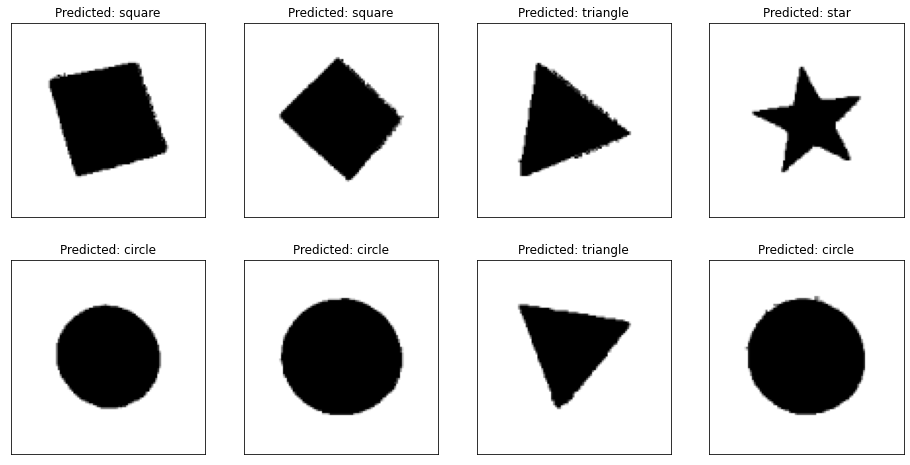

In [31]:
##lets check if it worked

show_images(8, X_test, model.predict(X_test))

## Plotting the performance of the model:

In [32]:
history.history

{'loss': [0.6093863248825073,
  0.00018349412130191922,
  0.00011320704652462155,
  9.658118506195024e-05,
  8.215655543608591e-05],
 'accuracy': [0.962543249130249, 1.0, 1.0, 1.0, 1.0],
 'val_loss': [1.169384631793946e-05,
  2.1945249955024337e-06,
  1.7889916534841177e-06,
  5.63126945962722e-07,
  0.0002310993877472356],
 'val_accuracy': [1.0, 1.0, 1.0, 1.0, 1.0]}

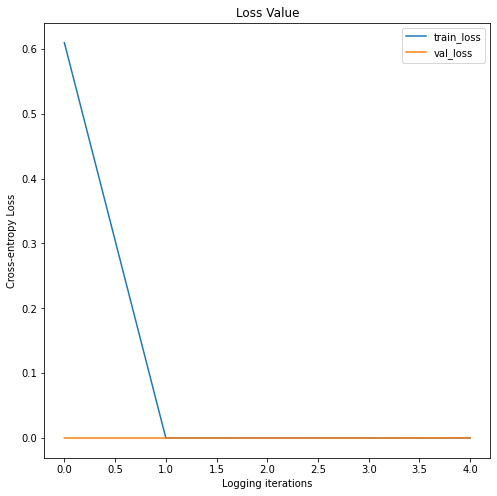

In [33]:
fig = plt.figure(figsize=(8,8))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel("Logging iterations")
plt.ylabel("Cross-entropy Loss")
plt.title("Loss Value")
plt.legend()
plt.show()

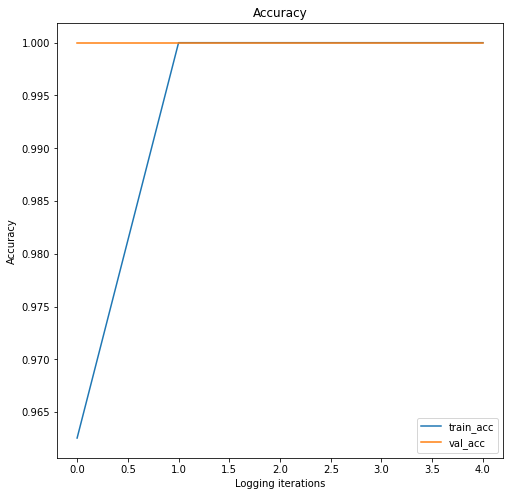

In [34]:
fig = plt.figure(figsize=(8,8))
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel("Logging iterations")
plt.ylabel("Accuracy")
plt.title("Accuracy")
plt.legend()
plt.show()

# Confusion matrix

In [36]:
predictions = model.predict([X_test])
pred_shape = [np.argmax(i) for i in predictions]
pred_shape[:5]

94/94 [==============================] - 3s 35ms/step


[3, 3, 1, 3, 2]

In [37]:
np.argmax(Y_test, axis=1)

array([3, 3, 1, ..., 3, 2, 1], dtype=int64)

Text(69.0, 0.5, 'Truth')

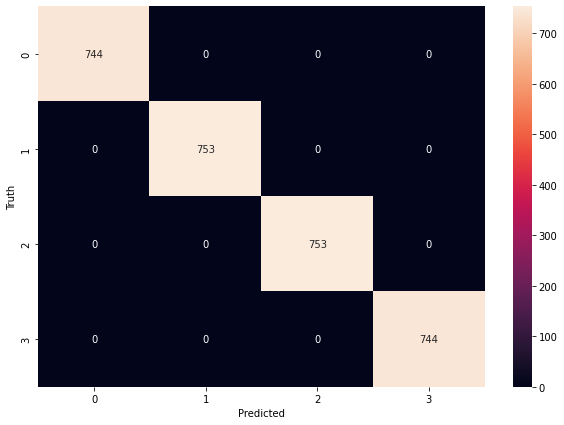

In [38]:
cm = tf.math.confusion_matrix(labels=np.argmax(Y_test, axis=1), predictions=pred_shape)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


square


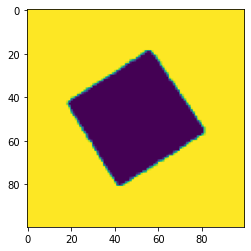

In [51]:
test = 476
plt.imshow(X_test[test])
print(shapes[np.argmax(predictions[test])])